# Housing price prediction in Bogota, Colombia
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

The objective of this jupyter notebook is to train a machine learning algorithm to predict the price of a house located in the city of Bogota, Colombia, based on known characteristics of the property to be sold. The real estate data to train the model were obtained by web scraping, using Selenium and Beautiful Soap from the fincaraiz.com.co portal; as explained in the jupyter notebook `webScraping_housing.ipynb`. It is clarified that the project has no commercial purposes but eminently academic.

_Updated: July 6th, 2023_

## Data understanding

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load data

In [22]:
cols = ['habitaciones','baños','parqueaderos','area_construida','area_privada','estrato','estado','antiguedad',
        'administracion','precio_m2', 'Ascensor', 'Circuito cerrado de TV',
       'Parqueadero Visitantes', 'Portería / Recepción', 'Zonas Verdes', 'Salón Comunal', 'Balcón',
       'Barra estilo americano', 'Calentador', 'Chimenea', 'Citófono', 'Cocina Integral', 'Terraza',
       'Vigilancia', 'Parques cercanos', 'Estudio', 'Patio', 'Depósito / Bodega', 'nombre','ubicacion','precio']
data = pd.read_csv('/content/drive/MyDrive/data/housing_fincaraiz.csv', sep=';', names=cols, header=0, encoding='utf-8')
print(data.shape)
data.head()


(8428, 31)


,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,estado,antiguedad,administracion,precio_m2,...,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,nombre,ubicacion,precio
0,2,2,1,92 m²,92 m²,4,No definida,9 a 15 años,$ 622.000 COP,"$ 6.521.739,13*m²",...,0,1,0,0,0,0,0,Apartamento,Centro Internacional,600000000
1,1,2,1,56 m²,56 m²,6,No definida,1 a 8 años,$ 523.000 COP,"$ 8.392.857,14*m²",...,0,1,0,0,0,0,0,Apartamento,Calleja Baja,470000000
2,3,4,2,144 m²,144 m²,6,No definida,16 a 30 años,$ 620.000 COP,"$ 6.597.222,22*m²",...,0,0,0,0,0,0,0,Apartamento,Cerros de Suba,950000000
3,1,1,0,31 m²,31 m²,4,Excelente,menor a 1 año,$ 130.000 COP,"$ 7.419.354,84*m²",...,0,0,0,0,0,0,0,Apartamento,Mazuren,230000000
4,3,2,1,52 m²,52 m²,4,No definida,1 a 8 años,$ 219.000 COP,"$ 5.576.923,08*m²",...,0,0,0,0,0,0,0,Apartamento,El plan,290000000


### Verify data types

In [23]:
data.dtypes

,0
habitaciones,object
baños,object
parqueaderos,object
area_construida,object
area_privada,object
estrato,int64
estado,object
antiguedad,object
administracion,object
precio_m2,object


### Count unique values for each variable

In [104]:
data.nunique()

,0
habitaciones,17
baños,11
parqueaderos,12
area_construida,696
area_privada,505
estrato,7
estado,4
antiguedad,6
administracion,1483
precio_m2,3854


In [25]:
print(data['habitaciones'].unique().tolist())
print(data['baños'].unique().tolist())
print(data['parqueaderos'].unique().tolist())
print(data['estrato'].unique().tolist())
print(data['estado'].unique().tolist())
print(data['antiguedad'].unique().tolist())
print(data['nombre'].unique().tolist())

['2', '1', '3', '4', '10', '6', '12', '5', '9', '11', '8', 'No definida', '13', '7', '15', '14', '16']
['2', '4', '1', '3', '5', '6', '7', 'No definida', '8', '10', '9']
['1', '2', '0', '3', '4', '6', '5', '8', '10', '9', '7', 'Más de 10']
[4, 6, 3, 5, 1, 2, 0]
['No definida', 'Excelente', 'Bueno', 'Remodelado']
['9 a 15 años', '1 a 8 años', '16 a 30 años', 'menor a 1 año', 'más de 30 años', 'No definida']
['Apartamento', 'Casa']


In [26]:
print(data['nombre'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%')

nombre
Apartamento    78.8%
Casa           21.2%
Name: proportion, dtype: object


### Data transformation

In [28]:
datacc = data[data['nombre'] == 'Apartamento']
datacc = datacc.drop(['estado','antiguedad','administracion','nombre'], axis=1)
datacc.shape

(6643, 27)

In [29]:
datacc.head()

,habitaciones,baños,parqueaderos,area_construida,area_privada,estrato,precio_m2,Ascensor,Circuito cerrado de TV,Parqueadero Visitantes,...,Citófono,Cocina Integral,Terraza,Vigilancia,Parques cercanos,Estudio,Patio,Depósito / Bodega,ubicacion,precio
0,2,2,1,92 m²,92 m²,4,"$ 6.521.739,13*m²",1,1,1,...,1,0,1,0,0,0,0,0,Centro Internacional,600000000
1,1,2,1,56 m²,56 m²,6,"$ 8.392.857,14*m²",1,0,1,...,0,0,1,0,0,0,0,0,Calleja Baja,470000000
2,3,4,2,144 m²,144 m²,6,"$ 6.597.222,22*m²",1,0,0,...,0,0,0,0,0,0,0,0,Cerros de Suba,950000000
3,1,1,0,31 m²,31 m²,4,"$ 7.419.354,84*m²",1,1,1,...,1,0,0,0,0,0,0,0,Mazuren,230000000
4,3,2,1,52 m²,52 m²,4,"$ 5.576.923,08*m²",1,1,1,...,1,0,0,0,0,0,0,0,El plan,290000000


#### Verify data types

In [30]:
datacc.dtypes

,0
habitaciones,object
baños,object
parqueaderos,object
area_construida,object
area_privada,object
estrato,int64
precio_m2,object
Ascensor,int64
Circuito cerrado de TV,int64
Parqueadero Visitantes,int64


#### Convert object types to appropriate numeric types

In [31]:
# Clean and convert 'precio_m2' to numerical
datacc['precio_m2'] = pd.to_numeric(datacc['precio_m2']
                                    .str.replace(r'[^0-9,]', '', regex=True)  # Remove *m² and $, except commas
                                    .str.replace(',', '.', regex=False))  # commas with dots


In [32]:
# Clean and convert 'area_construida' to numerical
datacc['area_construida'] = pd.to_numeric(datacc['area_construida']
                                    .str.replace(r'[^0-9,]', '', regex=True)  # Remove *m² and $, except commas
                                    .str.replace(',', '.', regex=False))  # commas with dots

In [33]:
# Clean and convert 'area_construida' to numerical
datacc['area_privada'] = pd.to_numeric(datacc['area_privada']
                                    .str.replace(r'[^0-9,]', '', regex=True)  # Remove *m² and $, except commas
                                    .str.replace(',', '.', regex=False))  # commas with dots

In [34]:
datacc['precio'] = pd.to_numeric(datacc['precio'].str.replace(r'[^0-9,.E+]', '', regex=True).str.replace(',', '.', regex=False), errors='coerce')

In [35]:
# Convert other object types to appropriate numeric types
datacc = datacc.replace('No definida', np.nan)  # Replace 'No definida' with NaN
datacc['habitaciones'] = pd.to_numeric(datacc['habitaciones'])
datacc['baños'] = pd.to_numeric(datacc['baños'])
datacc['parqueaderos'] = pd.to_numeric(datacc['parqueaderos'])


In [36]:
datacc.dtypes

,0
habitaciones,float64
baños,float64
parqueaderos,int64
area_construida,float64
area_privada,float64
estrato,int64
precio_m2,float64
Ascensor,int64
Circuito cerrado de TV,int64
Parqueadero Visitantes,int64


##### Transform 'ubicación' to categorical

In [37]:
# Transforming 'ubicacion' variable to categorical and creating a mapping to numeric codes
datacc['ubicacion'] = pd.Categorical(datacc['ubicacion'])
ubicacion_mapping = {category: code for code, category in enumerate(datacc['ubicacion'].cat.categories)}
print("Ubicacion Mapping:", ubicacion_mapping)

# Creating a reverse mapping to get original names from numeric codes
reverse_ubicacion_mapping = {v: k for k, v in ubicacion_mapping.items()}

# Converting 'ubicacion' to numeric categorical variable
datacc['ubicacion'] = datacc['ubicacion'].cat.codes

Ubicacion Mapping: {'ACACIAS': 0, 'AGRUPACION DE VIVIENDA LOS PINOS': 1, 'ALAMEDA CAMPESTRE': 2, 'AV DE LAS AMERICAS': 3, 'Acacias': 4, 'Acacias Usaquén': 5, 'Acevedo Tejada': 6, 'Acevedo tejada': 7, 'Alameda': 8, 'Alamos': 9, 'Alamos Norte': 10, 'Alcala': 11, 'Alcazares': 12, 'Alfonso lopez': 13, 'Alhambra': 14, 'Almendros': 15, 'Alsacia': 16, 'Alta Blanca': 17, 'Altos de Bella Suiza': 18, 'Altos de Riomar': 19, 'Altos de Suba': 20, 'Américas Central': 21, 'Américas Occidental': 22, 'Andes Norte': 23, 'Andes norte': 24, 'Antiguo Country': 25, 'Antiguo country': 26, 'Antonio Granados': 27, 'Antonio Nariño': 28, 'Arrayanes': 29, 'Atabanza': 30, 'Atlanta': 31, 'Autopista muzu': 32, 'BABILONIA': 33, 'BATAN': 34, 'BOSQUE DE MODELIA': 35, 'BOSQUE DE SAN ANTONIO': 36, 'BOSQUES DE VARSOVIA': 37, 'BRITALIA LA MONEDA': 38, 'Bachue': 39, 'Barrancas': 40, 'Barrancas norte': 41, 'Barrio el limonar': 42, 'Barrios Unidos': 43, 'Batan': 44, 'Batán': 45, 'Bavaria': 46, 'Belalcazar': 47, 'Belen fontibo

#### Handling missing data

In [38]:
datacc.dtypes

,0
habitaciones,float64
baños,float64
parqueaderos,int64
area_construida,float64
area_privada,float64
estrato,int64
precio_m2,float64
Ascensor,int64
Circuito cerrado de TV,int64
Parqueadero Visitantes,int64


In [40]:
# Filling missing values for numerical columns with the median
numerical_cols = ['habitaciones', 'baños', 'parqueaderos', 'area_construida', 'area_privada', 'estrato', 'precio_m2', 'precio']
datacc[numerical_cols] = datacc[numerical_cols].apply(lambda x: x.fillna(x.median()))

# Filling missing values for categorical columns with the mode
# categorical_cols = ['estado', 'antiguedad', 'administracion']
# datacc[categorical_cols] = datacc[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

## Data Exploration

#### Dimensionality reduction

In [49]:
# Dimensionality Reduction using PCA
features = datacc.drop(columns=['precio'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce dimensionality while retaining 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)

# Creating a DataFrame with principal components
pca_columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
datacc_pca = pd.DataFrame(data=principal_components, columns=pca_columns)

# Display the explained variance ratio of each principal component
print("Explained variance ratio of each principal component:", pca.explained_variance_ratio_)

# Adding original feature names as metadata
original_columns = features.columns.tolist()
datacc_pca.attrs['original_columns'] = original_columns

# Displaying column names and metadata
print("Principal Component Columns:", datacc_pca.columns.tolist())
print("Original Columns used in PCA:", datacc_pca.attrs['original_columns'])

# Display the shape of the dataset after PCA
datacc_pca['precio'] = datacc['precio'].reset_index(drop=True)
print(datacc_pca.shape)
display(datacc_pca.head())


Explained variance ratio of each principal component: [0.15137488 0.0950102  0.07254434 0.068107   0.05007293 0.04803943
 0.04179072 0.04015031 0.03878354 0.03771963 0.03516848 0.03388974
 0.032563   0.03064109 0.02763037 0.02591479 0.02515483 0.02448744
 0.02272263 0.02043823 0.01982403 0.01938037]
Principal Component Columns: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']
Original Columns used in PCA: ['habitaciones', 'baños', 'parqueaderos', 'area_construida', 'area_privada', 'estrato', 'precio_m2', 'Ascensor', 'Circuito cerrado de TV', 'Parqueadero Visitantes', 'Portería / Recepción', 'Zonas Verdes', 'Salón Comunal', 'Balcón', 'Barra estilo americano', 'Calentador', 'Chimenea', 'Citófono', 'Cocina Integral', 'Terraza', 'Vigilancia', 'Parques cercanos', 'Estudio', 'Patio', 'Depósito / Bodega', 'ubicacion']
(6643, 23)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,precio
0,0.706862,1.506541,-0.923250,1.608773,-0.839918,-2.532300,-1.479804,2.074611,-1.594381,0.970650,...,0.248100,0.653471,-1.943145,0.282268,-0.460744,-0.011166,-0.158924,0.057146,-0.244408,600000000.0
1,0.566340,0.859730,-0.863806,1.447979,-1.055524,-3.667758,-2.088716,2.159127,-1.382856,1.160599,...,0.382672,-1.013807,0.224077,-1.271625,0.584834,-0.472119,-1.029475,0.347049,0.410624,470000000.0
2,1.843643,-1.705467,-0.368137,1.216775,-1.243986,-0.775117,-0.645024,0.326559,-0.003843,-0.468929,...,-0.370789,0.592632,1.536134,-1.029213,0.423755,0.520815,-0.579164,0.552061,0.518536,950000000.0
3,0.319429,1.345371,-1.409685,2.723556,-0.105575,-0.935678,0.415117,0.416620,-0.204381,0.833288,...,1.985594,-0.572454,0.037905,0.810384,0.277411,-0.167286,1.524014,0.276756,-0.016112,230000000.0
4,0.922453,0.417074,-0.927635,1.675174,-0.077071,0.450772,0.339743,-0.289229,0.046201,-0.434265,...,0.174937,-1.273953,-0.932165,0.118286,-1.037357,0.190191,-0.441055,0.279695,0.149875,290000000.0


#### Descriptive Statistics

In [54]:
# Descriptive statistics for selected numerical columns
print(datacc[['habitaciones', 'baños', 'parqueaderos', 'area_construida', 'area_privada', 'estrato', 'precio_m2', 'precio']].describe())

       habitaciones        baños  parqueaderos  area_construida  \
count   6643.000000  6643.000000   6643.000000      6643.000000   
mean       2.674394     2.469818      1.427668       153.277158   
std        0.773772     1.082330      1.003156      1964.912158   
min        1.000000     1.000000      0.000000        16.000000   
25%        2.000000     2.000000      1.000000        60.000000   
50%        3.000000     2.000000      1.000000        83.000000   
75%        3.000000     3.000000      2.000000       128.000000   
max        8.000000     8.000000     10.000000    139000.000000   

        area_privada      estrato     precio_m2        precio  
count    6643.000000  6643.000000  6.643000e+03  6.643000e+03  
mean      108.100518     4.449195  7.001884e+06  7.132005e+08  
std      1718.173122     1.234211  1.001492e+08  3.082202e+09  
min         0.000000     0.000000  3.444440e+03  1.950000e+06  
25%        33.000000     3.000000  4.413874e+06  2.925000e+08  
50%        6

In [55]:
# Frequency count for 'ubicacion'
print("Frequency count for 'ubicacion':")
print(datacc['ubicacion'].value_counts())

# Display original names from numeric codes
print("Original names for 'ubicacion':")
print(datacc['ubicacion'].map(reverse_ubicacion_mapping).value_counts())

# Mode for 'ubicacion'
print("Mode for 'ubicacion':", datacc['ubicacion'].mode()[0])

# Cardinality (number of unique categories) for 'ubicacion'
print("Cardinality for 'ubicacion':", datacc['ubicacion'].nunique())

# Proportion of each category for 'ubicacion'
print("Proportion of each category for 'ubicacion' (%):")
print(datacc['ubicacion'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Frequency count for 'ubicacion':
ubicacion
125    283
426    191
198    181
686    164
731    161
      ... 
793      1
373      1
632      1
166      1
338      1
Name: count, Length: 813, dtype: int64
Original names for 'ubicacion':
ubicacion
Cedritos             283
Los Rosales          191
Colina Campestre     181
Suba                 164
Usaquén              161
                    ... 
hogares Soacha         1
La asuncion            1
San miguel             1
Chicó Oriental         1
LA VICTORIA NORTE      1
Name: count, Length: 813, dtype: int64
Mode for 'ubicacion': 125
Cardinality for 'ubicacion': 813
Proportion of each category for 'ubicacion' (%):
ubicacion
125    4.3%
426    2.9%
198    2.7%
686    2.5%
731    2.4%
       ... 
793    0.0%
373    0.0%
632    0.0%
166    0.0%
338    0.0%
Name: proportion, Length: 813, dtype: object


#### Histograms

<Axes: xlabel='precio', ylabel='Count'>

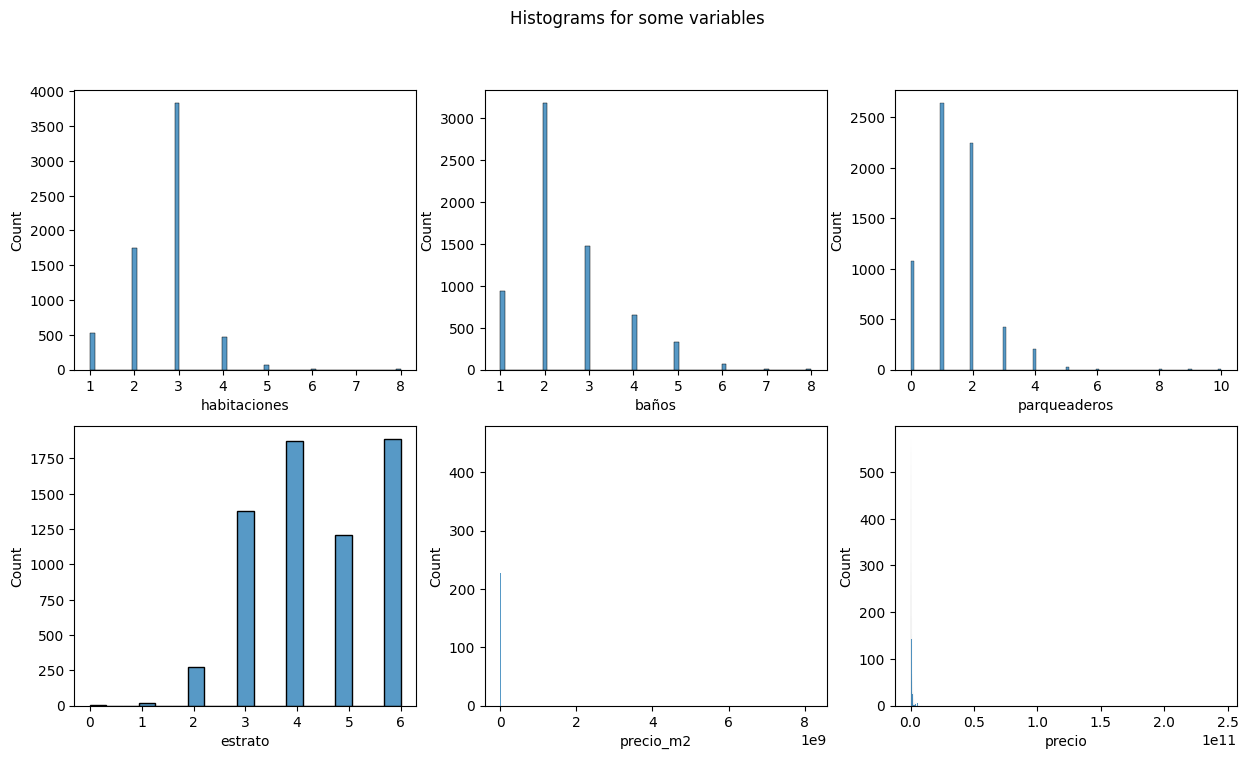

In [56]:
# Histograms after outliers treatment
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['habitaciones'], ax=ax1)
sns.histplot(datacc['baños'], ax=ax2)
sns.histplot(datacc['parqueaderos'], ax=ax3)
sns.histplot(datacc['estrato'], ax=ax4)
sns.histplot(datacc['precio_m2'], ax=ax5)
sns.histplot(datacc['precio'], ax=ax6)

#### Boxplots

<Axes: >

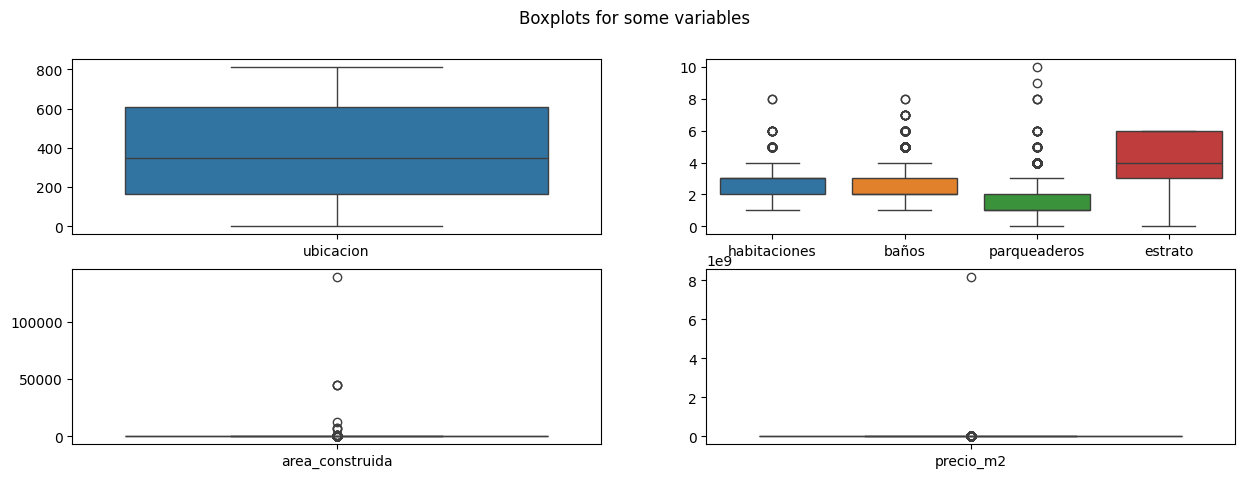

In [57]:
### Boxplot
#green_diamond = dict(markerfacecolor='g', marker='D')
#fig, ax = plt.subplots()
#ax.set_title('Boxplot variable precio')
#ax.boxplot(datacc['precio'], flierprops=green_diamond, labels=["Precio"])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['ubicacion']], ax=ax1)
sns.boxplot(data=datacc[['habitaciones', 'baños', 'parqueaderos','estrato']], ax=ax2)
sns.boxplot(data=datacc[['area_construida']], ax=ax3)
sns.boxplot(data=datacc[['precio_m2']], ax=ax4)

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

##### With z-score threshold

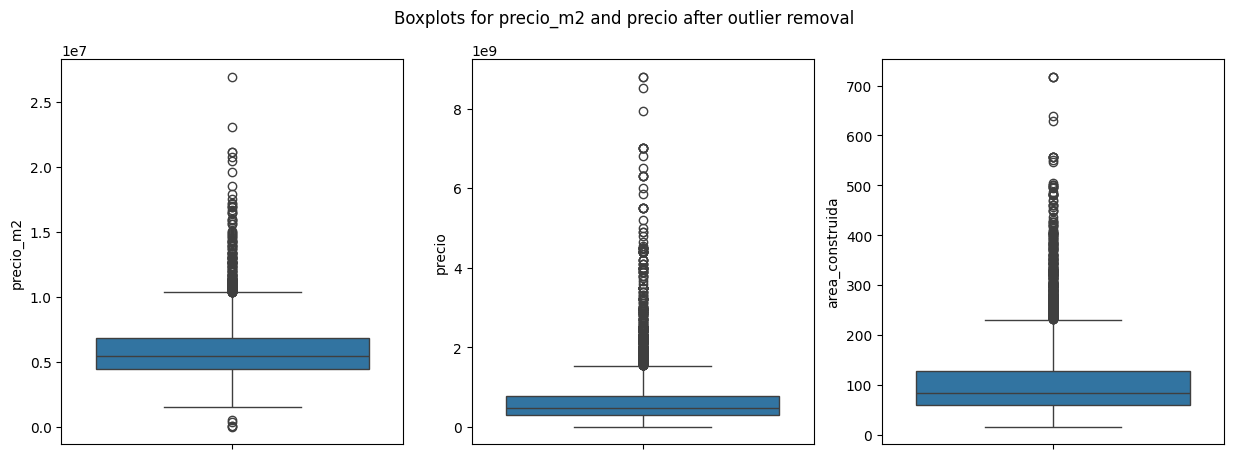

In [71]:
# List of columns to evaluate for outliers
cols_check = ['precio', 'precio_m2', 'area_construida']

# Calculate the Z-score for each selected feature
z_scores = np.abs(stats.zscore(datacc[cols_check]))

# Set a threshold for Z-score (commonly 3 for extreme outliers)
threshold = 3

# Identify rows to keep based on Z-score threshold across all columns
rows_to_keep = (z_scores < threshold).all(axis=1)
datacc2 = datacc[rows_to_keep].copy()

# Plotting boxplots after outlier removal
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Boxplots for precio_m2 and precio after outlier removal')
sns.boxplot(data=datacc2['precio_m2'], ax=ax1)
sns.boxplot(data=datacc2['precio'], ax=ax2)
sns.boxplot(data=datacc2['area_construida'], ax=ax3)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### With Inter-Quartil Range (IQR)

(5973, 27)


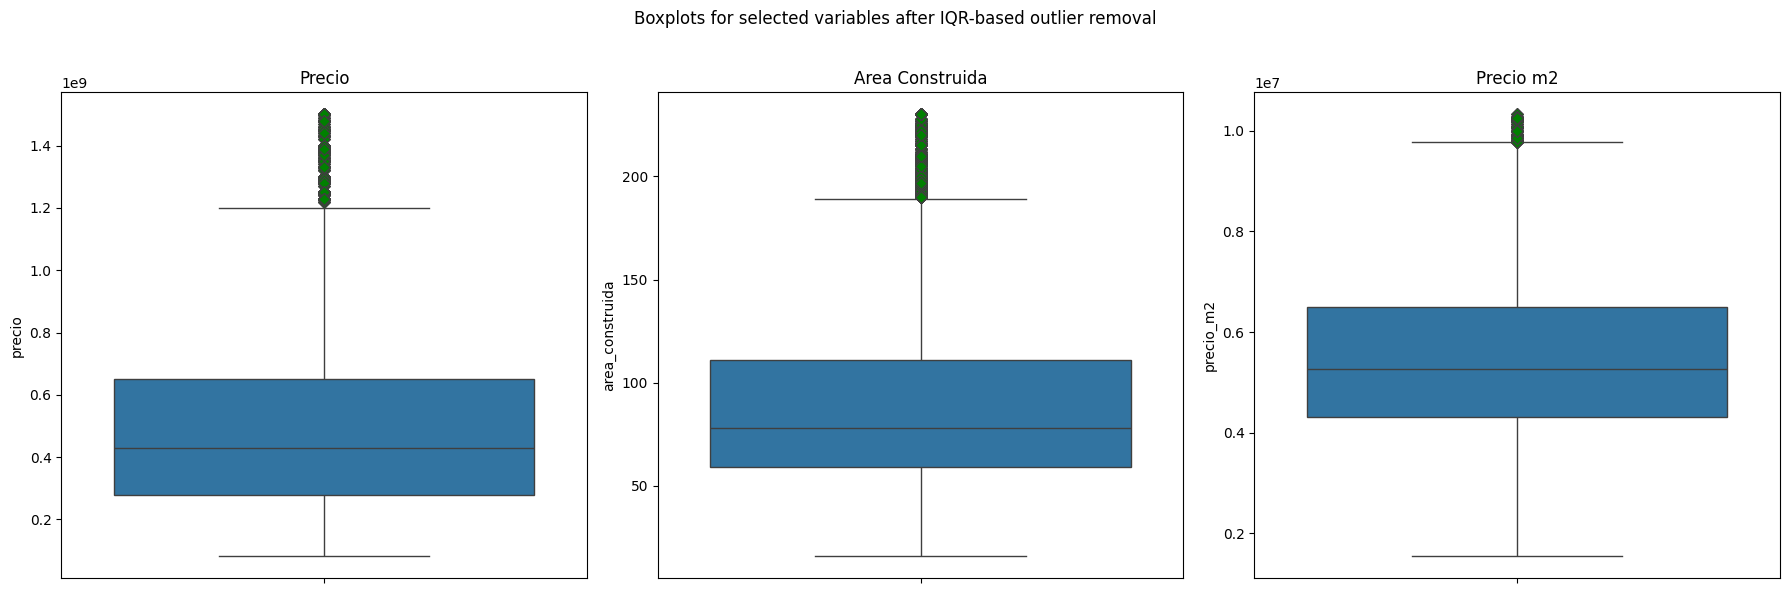

In [68]:
# Find Q1, Q3, and interquartile range for 'precio', 'area_construida', and 'precio_m2'
columns_to_check = ['precio', 'precio_m2', 'area_construida']
Q1 = datacc[columns_to_check].quantile(0.25)
Q3 = datacc[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3 for all selected columns
datacc3 = datacc[
    (datacc['precio'] >= (Q1['precio'] - 1.5 * IQR['precio'])) & (datacc['precio'] <= (Q3['precio'] + 1.5 * IQR['precio'])) &
    (datacc['area_construida'] >= (Q1['area_construida'] - 1.5 * IQR['area_construida'])) & (datacc['area_construida'] <= (Q3['area_construida'] + 1.5 * IQR['area_construida'])) &
    (datacc['precio_m2'] >= (Q1['precio_m2'] - 1.5 * IQR['precio_m2'])) & (datacc['precio_m2'] <= (Q3['precio_m2'] + 1.5 * IQR['precio_m2']))
].copy()

# Displaying the shape of the dataframe after IQR-based outlier removal
print(datacc3.shape)

# Boxplots for 'precio', 'area_construida', and 'precio_m2' after IQR-based outlier removal
green_diamond = dict(markerfacecolor='g', marker='D')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Boxplots for selected variables after IQR-based outlier removal')
sns.boxplot(data=datacc3['precio'], ax=ax1, flierprops=green_diamond)
ax1.set_title('Precio')
sns.boxplot(data=datacc3['area_construida'], ax=ax2, flierprops=green_diamond)
ax2.set_title('Area Construida')
sns.boxplot(data=datacc3['precio_m2'], ax=ax3, flierprops=green_diamond)
ax3.set_title('Precio m2')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Axes: xlabel='precio', ylabel='Count'>

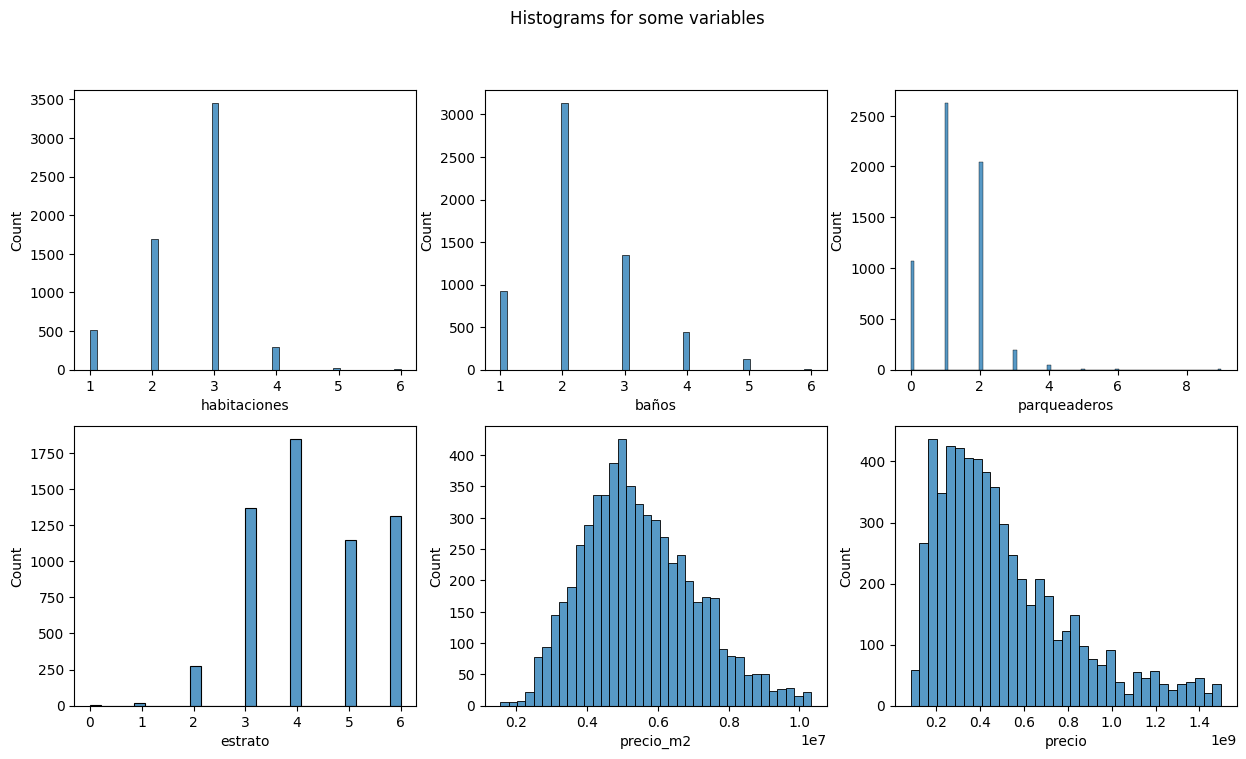

In [69]:
# Histograms after outliers treatment
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,8))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc3['habitaciones'], ax=ax1)
sns.histplot(datacc3['baños'], ax=ax2)
sns.histplot(datacc3['parqueaderos'], ax=ax3)
sns.histplot(datacc3['estrato'], ax=ax4)
sns.histplot(datacc3['precio_m2'], ax=ax5)
sns.histplot(datacc3['precio'], ax=ax6)

### EDA (Exploratory Data Analysis)

In [72]:
X = datacc3[['habitaciones', 'baños', 'parqueaderos','area_construida','estrato','precio_m2', 'ubicacion']].copy()
print(X.shape)

Y=pd.DataFrame()
Y = datacc3['precio']
print(Y.shape)

(5973, 7)
(5973,)


#### Correlations

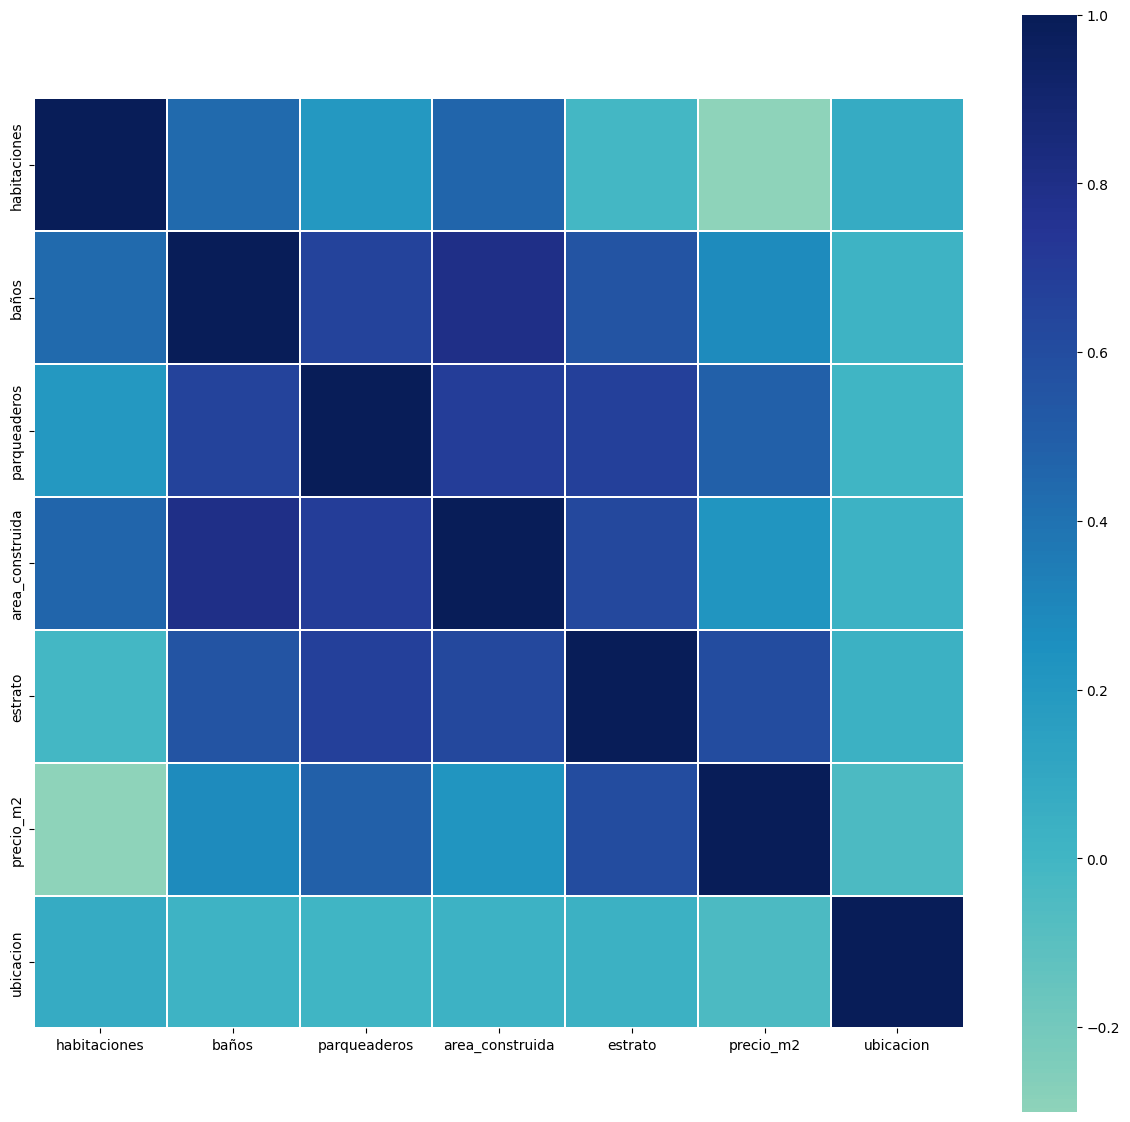

In [73]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X)

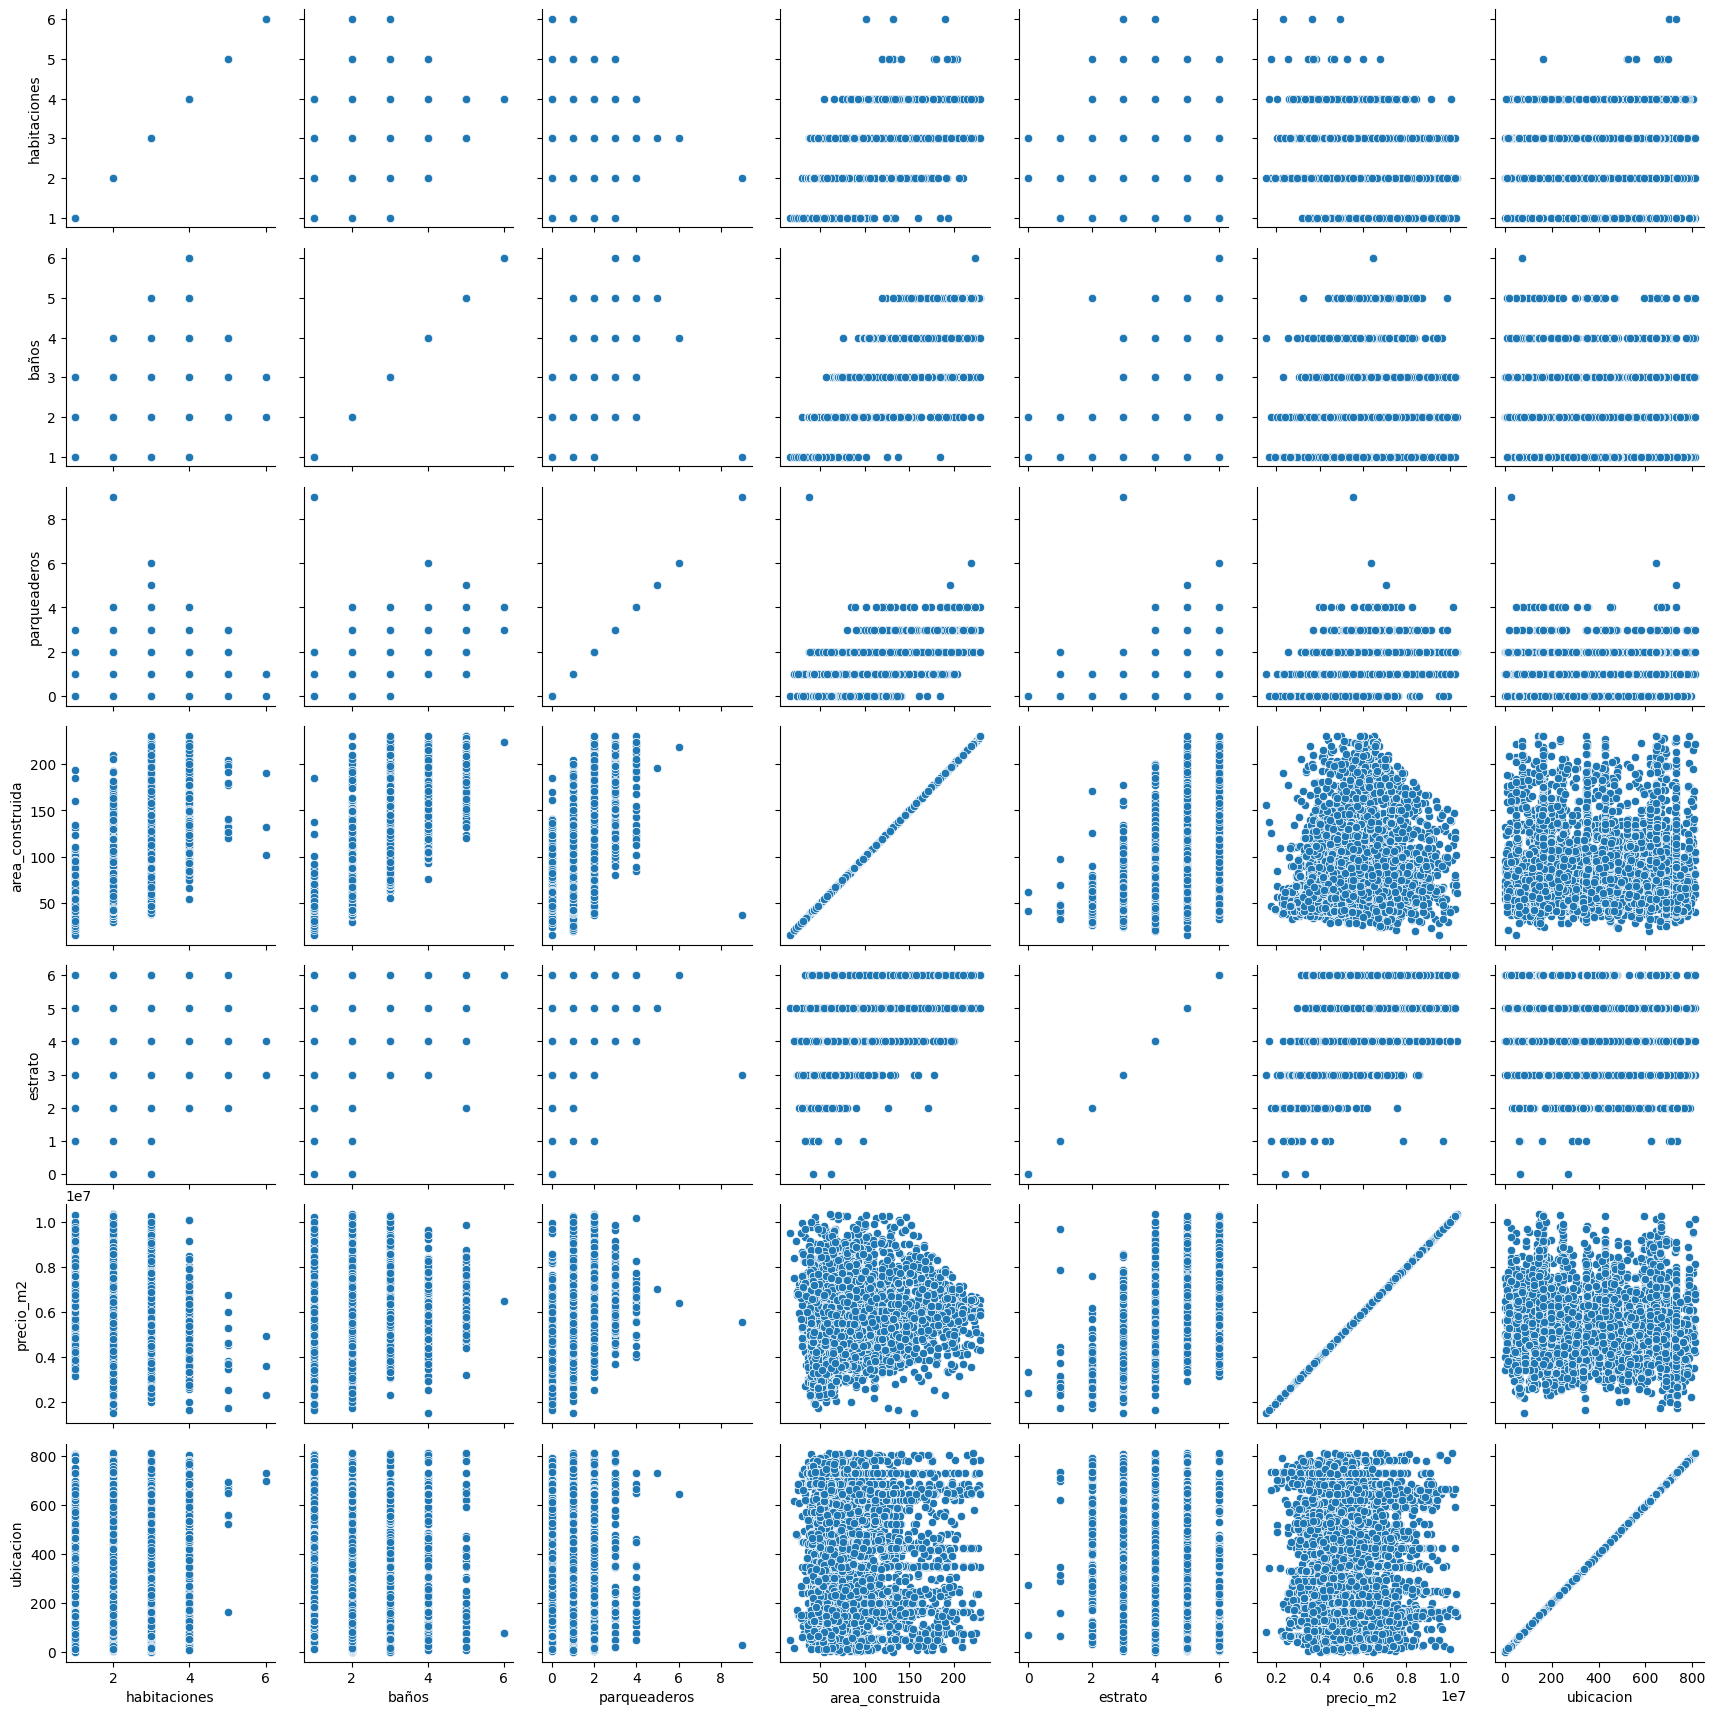

In [74]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE

### Data partitioning


In [76]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(5973, 7)

In [77]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.30,
                                         random_state=42)

### Multivariate lineal regression

In [78]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [79]:
# accuracy check
mse = MSE(y_test, y_pred1)
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 3163624854101738.50
RMSE: 56246109.68
MAE: 38649321.95
R2: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [105]:
!pip install lightgbm > \dev\null 2>&1
!pip install dask[dataframe] \dev\null 2>&1

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.8 MB/s eta 0:00:00


In [106]:
import lightgbm as lgb

In [108]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [109]:
# accuracy check
mse = MSE(y_test, y_pred2)
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 310122452397655.38
RMSE: 17610293.93
MAE: 11844871.85
R2: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


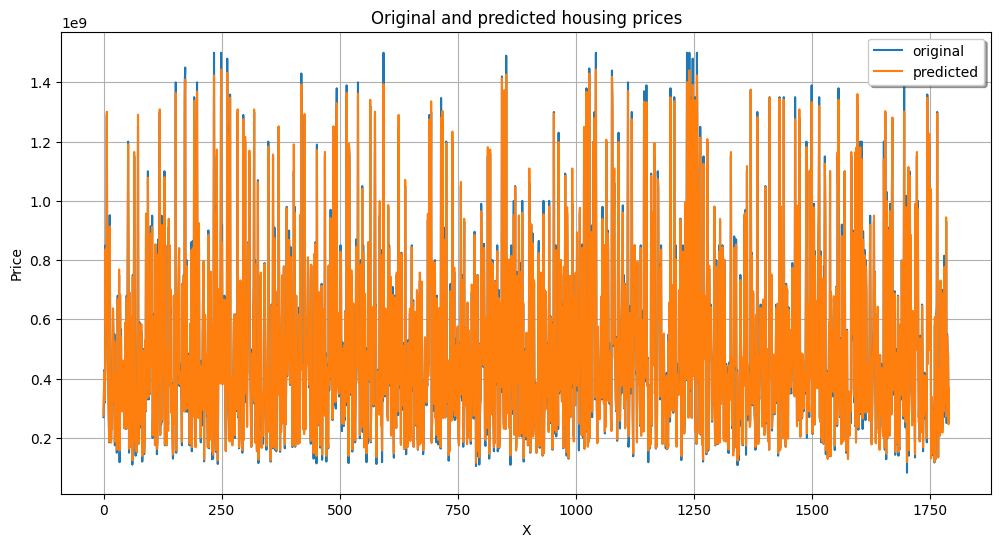

In [85]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted housing prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

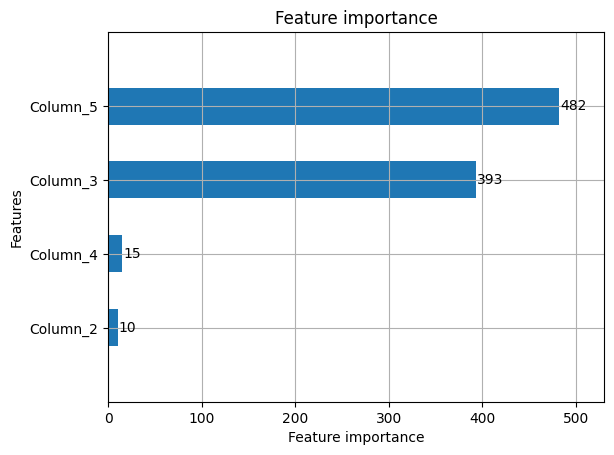

In [86]:
# plotting feature importance
lgb.plot_importance(model2, height=.5)

<Axes: >

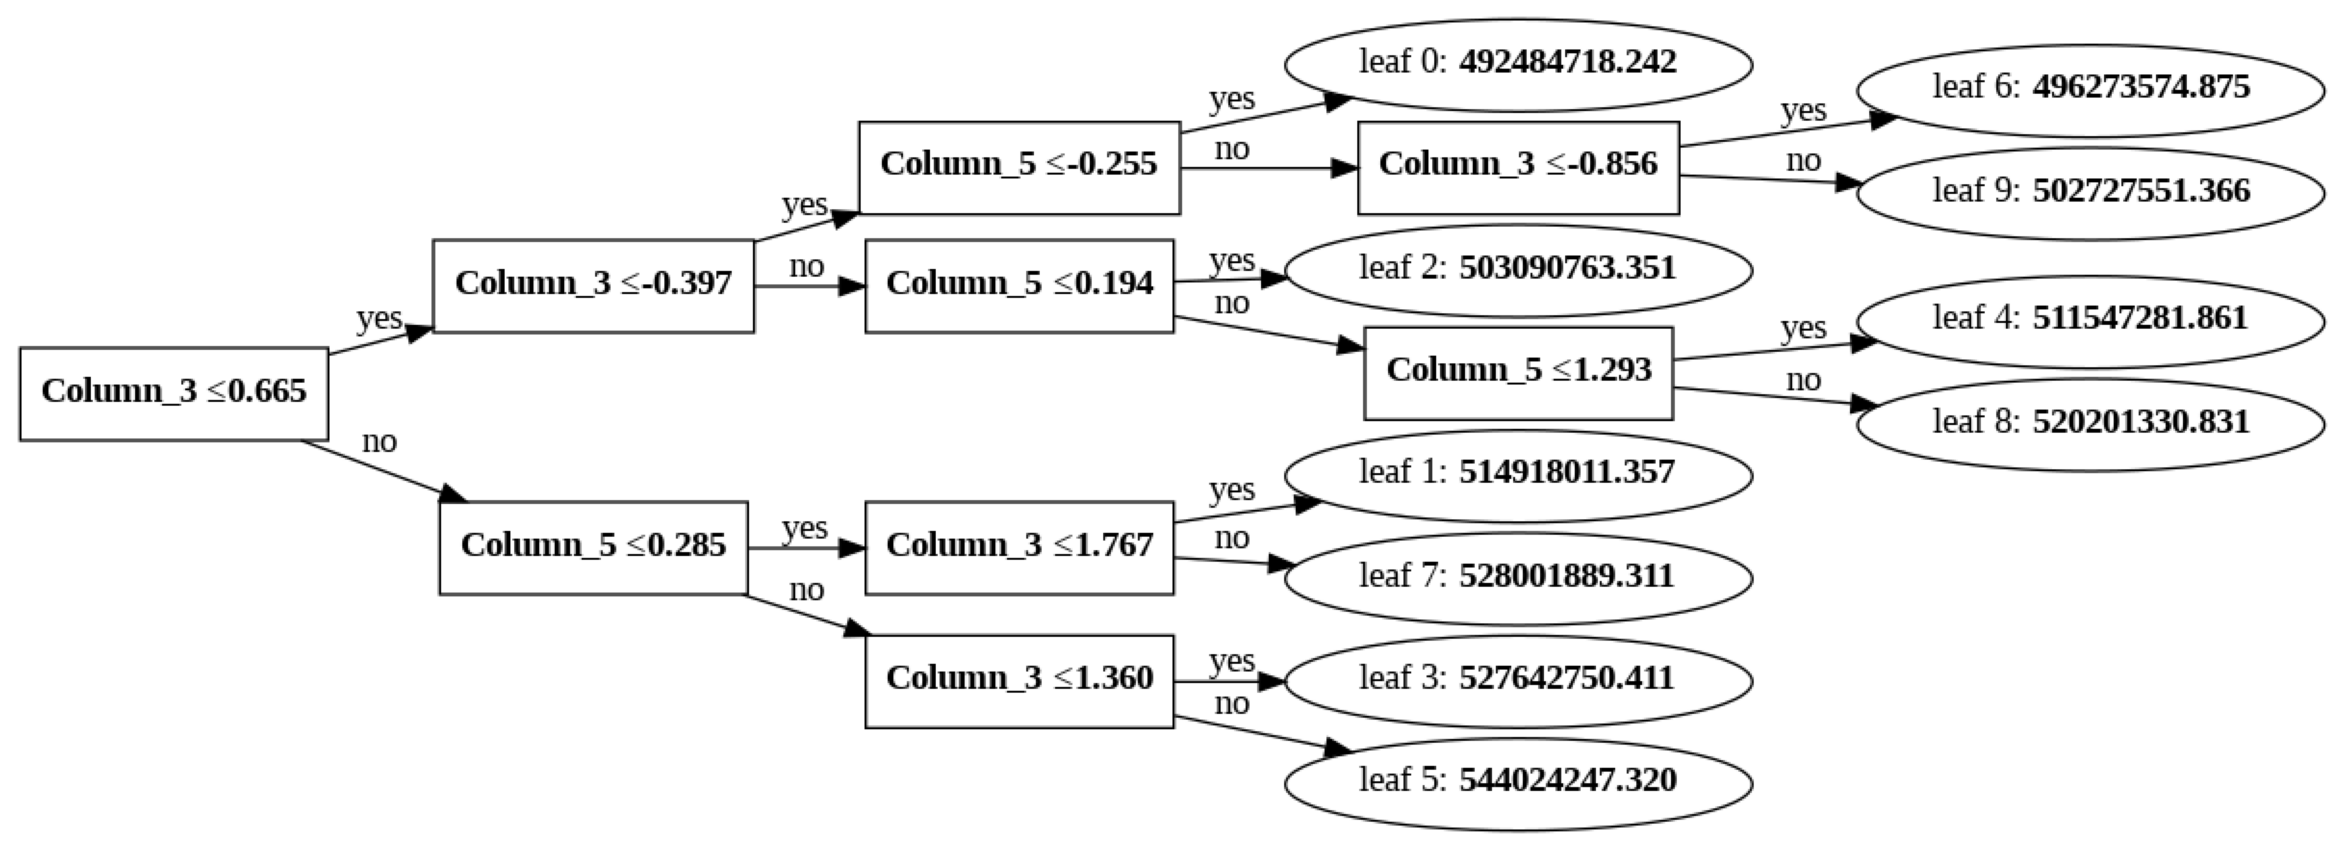

In [87]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred3 = rf_reg.predict(X_test)

In [91]:
# accuracy check
mse = MSE(y_test, y_pred3)
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 92200715437824.83
RMSE: 9602120.36
MAE: 4260217.60
R2: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [92]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [93]:
#Define model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [94]:
#Training
xg_reg.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [95]:
#K-fold cross validation
scores = cross_val_score(xg_reg, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [96]:
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xg_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [97]:
# Pred
y_pred4 = xg_reg.predict(X_test)

In [98]:
# accuracy check
mse = MSE(y_test, y_pred4)
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

MSE: 96742330517009.58
RMSE: 9835767.92
MAE: 5559287.72
R2: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


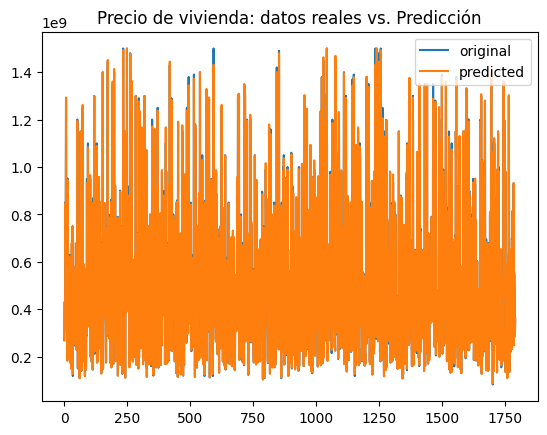

In [99]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Precio de vivienda: datos reales vs. Predicción")
plt.legend()
plt.show()

## References

https://github.com/kiteco/kite-python-blog-post-code/blob/master/Web%20Scraping%20Tutorial/script.py

https://medium.com/geekculture/scrappy-guide-to-web-scraping-with-python-475385364381

https://stackoverflow.com/questions/47730671/python-3-using-requests-does-not-get-the-full-content-of-a-web-page